In [1]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

import cv2
import itertools
import matplotlib.pyplot as plt 
import numpy as np 
import os
import pandas as pd
import random

ROWS = 180
COLS = 180
CHANNELS = 3

In [2]:
dogs_dir = './pet-images/dog'
cats_dir = './pet-images/cat'
dog_paths = [os.path.join(dogs_dir, p) for p in os.listdir(dogs_dir)]
cat_paths = [os.path.join(cats_dir, p) for p in os.listdir(cats_dir)]

In [3]:
print(random.choices(dog_paths, k=10))
print(random.choices(cat_paths, k=10))

['./pet-images/dog\\6899.jpg', './pet-images/dog\\1116.jpg', './pet-images/dog\\11327.jpg', './pet-images/dog\\5911.jpg', './pet-images/dog\\4462.jpg', './pet-images/dog\\9280.jpg', './pet-images/dog\\11131.jpg', './pet-images/dog\\2546.jpg', './pet-images/dog\\4468.jpg', './pet-images/dog\\7977.jpg']
['./pet-images/cat\\8504.jpg', './pet-images/cat\\6148.jpg', './pet-images/cat\\8574.jpg', './pet-images/cat\\7201.jpg', './pet-images/cat\\12443.jpg', './pet-images/cat\\11948.jpg', './pet-images/cat\\10416.jpg', './pet-images/cat\\10786.jpg', './pet-images/cat\\5148.jpg', './pet-images/cat\\7375.jpg']


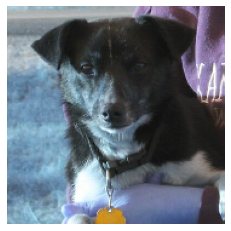

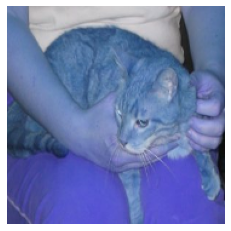

In [4]:
def read_image_from_file(file_path):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  return cv2.resize(img, (ROWS, COLS),interpolation=cv2.INTER_CUBIC)

plt.axis("off")
plt.imshow(read_image_from_file(random.choices(dog_paths, k=1)[0]))
plt.show()
plt.axis("off")
plt.imshow(read_image_from_file(random.choices(cat_paths, k=1)[0]))
plt.show()

In [5]:
X = []
print('Loading cat images...')
#cat_paths = cat_paths[:5000]
#dog_paths = dog_paths[:5000]

for i in range(len(cat_paths)):
    img = read_image_from_file(cat_paths[i])
    X.append(img.flatten() / 255)

print(len(X))
print('Loading dog images...')
for i in range(len(dog_paths)):
    img = read_image_from_file(dog_paths[i])
    X.append(img.flatten() / 255)
print(len(X))

Loading cat images...
11741
Loading dog images...
23410


In [6]:
y = [0] * len(cat_paths)
y.extend([1] * len(dog_paths))
print(len(y))

23410


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
from sklearn.tree import DecisionTreeClassifier as dtc

clf = dtc(min_samples_leaf=16)
# A few experiments seem to confirm that 16 is a comparatively okay constraint.
clf.fit(X_train, y_train)

print(clf.get_depth())
# Return the depth of the decision tree.
print(clf.get_n_leaves())
# Return the number of leaves of the decision tree.

24
715


In [9]:
predicted = clf.predict(X_test)
np.random.choice(a=predicted, size=100)

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

Confusion matrix:
[[1353  956]
 [1111 1262]]


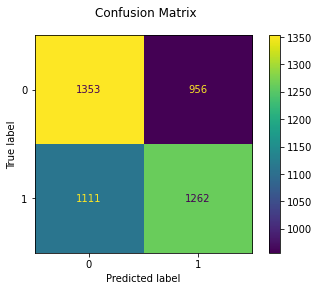

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

Confusion matrix:
[[8200 1232]
 [1507 7789]]


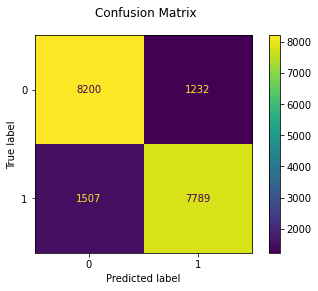

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(y_true=y_train, y_pred=clf.predict(X_train))
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted)

array([[1353,  956],
       [1111, 1262]], dtype=int64)